In [41]:
import numpy as np
import pandas as pd

# 插值

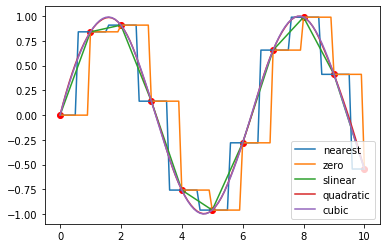

In [56]:
# -*-coding:utf-8 -*-
import numpy as np
from scipy import interpolate
import pylab as pl

x=np.linspace(0,10,11)
#x=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
y=np.sin(x)
xnew=np.linspace(0,10,101)
pl.plot(x,y,"ro")

for kind in ["nearest","zero","slinear","quadratic","cubic"]:#插值方式
    #"nearest","zero"为阶梯插值
    #slinear 线性插值
    #"quadratic","cubic" 为2阶、3阶B样条曲线插值
    f=interpolate.interp1d(x,y,kind=kind)
    # ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=str(kind))
pl.legend(loc="lower right")
pl.show()

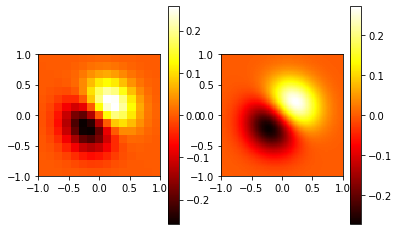

In [58]:
# -*- coding: utf-8 -*-
"""
演示二维插值。
"""
import numpy as np
from scipy import interpolate
import pylab as pl
import matplotlib as mpl

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为15*15的网格
y,x= np.mgrid[-1:1:15j, -1:1:15j]

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值

#三次样条二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)#x
ynew = np.linspace(-1,1,100)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值

# 绘图
# 为了更明显地比较插值前后的区别，使用关键字参数interpolation='nearest'
# 关闭imshow()内置的插值运算。
pl.subplot(121)
im1=pl.imshow(fvals, extent=[-1,1,-1,1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")#pl.cm.jet
#extent=[-1,1,-1,1]为x,y范围  favals为
pl.colorbar(im1)

pl.subplot(122)
im2=pl.imshow(fnew, extent=[-1,1,-1,1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im2)
pl.show()

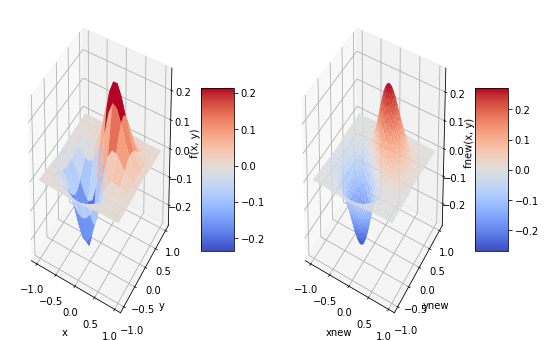

In [59]:
# -*- coding: utf-8 -*-
"""
演示二维插值。
"""
# -*- coding: utf-8 -*-
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为20*20的网格
x = np.linspace(-1, 1, 20)
y = np.linspace(-1,1,20)
x, y = np.meshgrid(x, y)#20*20的网格数据

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值

fig = plt.figure(figsize=(9, 6))
#Draw sub-graph1
ax=plt.subplot(1, 2, 1,projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

#二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')#newfunc为一个函数

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)#x
ynew = np.linspace(-1,1,100)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值  np.shape(fnew) is 100*100
xnew, ynew = np.meshgrid(xnew, ynew)
ax2=plt.subplot(1, 2, 2,projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x, y)')
plt.colorbar(surf2, shrink=0.5, aspect=5)#标注

plt.show()

In [42]:
np.linspace(0,10,101)#等差数列

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [50]:
df = pd.DataFrame(np.random.randn(6,4),index=list('ABCDEF'),
columns=['one','two','three','four'])
df.iloc[2,:-2] = np.nan
df.iloc[2:-1,2] = np.nan
print("带有缺失值的数据")
print(df)

带有缺失值的数据
        one       two     three      four
A  0.263383  0.215643 -0.543778 -0.668109
B -0.687326  1.164235  0.230863 -0.219881
C       NaN       NaN       NaN  0.695923
D -1.068483 -0.500604       NaN  0.923207
E  1.170725  0.161223       NaN -0.053862
F -0.853252 -0.237059 -1.178606  1.372401


In [52]:
df.interpolate?

In [61]:
df.interpolate(method = 'linear')

,one,two,three,four
A,0.263383,0.215643,-0.543778,-0.668109
B,-0.687326,1.164235,0.230863,-0.219881
C,-0.877904,0.331816,-0.121504,0.695923
D,-1.068483,-0.500604,-0.473872,0.923207
E,1.170725,0.161223,-0.826239,-0.053862
F,-0.853252,-0.237059,-1.178606,1.372401
